<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#2-load-libraries-and-dataset" data-toc-modified-id="2-load-libraries-and-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>2 load libraries and dataset</a></span></li><li><span><a href="#3-data-profiling" data-toc-modified-id="3-data-profiling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>3 data profiling</a></span><ul class="toc-item"><li><span><a href="#3.1-columns-description" data-toc-modified-id="3.1-columns-description-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>3.1 columns description</a></span></li></ul></li><li><span><a href="#4.-data-cleaning" data-toc-modified-id="4.-data-cleaning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>4. data cleaning</a></span><ul class="toc-item"><li><span><a href="#4.1-drop-duplicates" data-toc-modified-id="4.1-drop-duplicates-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>4.1 drop duplicates</a></span></li><li><span><a href="#4.2-treat-missing-values" data-toc-modified-id="4.2-treat-missing-values-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>4.2 treat missing values</a></span><ul class="toc-item"><li><span><a href="#4.2.1-categorise-numerical-vs-object-values" data-toc-modified-id="4.2.1-categorise-numerical-vs-object-values-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>4.2.1 categorise numerical vs object values</a></span></li><li><span><a href="#4.2.2-treat-object-columns" data-toc-modified-id="4.2.2-treat-object-columns-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>4.2.2 treat object columns</a></span></li><li><span><a href="#4.2.3-treat-numerical-columns-with-regression" data-toc-modified-id="4.2.3-treat-numerical-columns-with-regression-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>4.2.3 treat numerical columns with regression</a></span></li></ul></li></ul></li></ul></div>

# 2 load libraries and dataset

<a id="load_libraries_and_dataset"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('movie_metadata.csv')
pd.set_option('display.max_columns', None)
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


# 3 data profiling
<a id="dataprofiling"></a>

In [3]:
df.shape

(5043, 28)

In [4]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

## 3.1 columns description 
<a id="coldescription"></a>

| No | <div style ="width:150px"> columns </div>|<div style="width:400px"> description </div>|
| :-- | :-- | :-- |
|0| color | film colorization: 'black or white' or 'color' |
|1| director_name | director name for each movie |
|2| num_critic_for_reviews | number of critical reviews on imdb |
|3| duration | film duration in minutes |
|4| director_facebook_likes | number of likes on movie directors' facebook page |
|5| actor_3_facebook_likes | number of likes on actor_3's facebook page |
|6| actor_2_name | the name of actor_2 |
|7| actor_1_facebook_likes | number of likes on actor_1's facebook page |
|8| gross | gross earning of movie in USD dollars |
|9| genres | film categorization like: 'action', 'romance', 'literature' |
|10| actor_1_name | the name of actor for main character, actor_1 |
|11| movie_title | title of the movie |
|12| num_voted_users | number of imdb users who voted for the movie |
|13| cast_total_facebook_likes | total number of likes for facebook pages of the cast |
|14| actor_3_name | name of actor_3 |
|15| facenumber_in_poster | number of faces in marketing posters |
|16| plot_keywords | keywords of the plots |
|17| movie_imdb_link | link to the movie's imdb page |
|18| num_user_for_reviews | number of users who provide review on imdb |
|19| language | the main language used in the movie |
|20| country | country where the movie is produced |
|21| content_rating | content rating of the movie, e.g. R, PG18... |
|22| budget | budget allocated for movie production |
|23| title_year | the year in which the movie is released | 
|24| actor_2_facebook_likes |  number of likes on actor_3's facebook page |
|25| imdb_score | imdb score for the movie | 
|26| aspect_ratio | aspect ratio which the movie is filmed in, e.g. 1.78, 2.35...
|27| movie_facebook_likes | number of facebook likes on the movie page |

# 4. data cleaning
<a id="data_cleaning"></a>

In [7]:
# drop duplicates
df.drop_duplicates(inplace=True)

## 4.2 treat missing values
<a id="nan"></a>

In [8]:
# extract number of null obsrvations in each column
df.isnull().sum()

color                         19
director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

### 4.2.1 categorise numerical vs object values
<a id = 'categorise_null_cols' ></a> 
- object columns: null values can be dropped (too much work to manually search and fill)
- numerical columns: fill na values with appropriate statistical operation

In [9]:
# determine dtypes within dataset
df.dtypes  # no supposed numerical columns have 'object' dtype

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [10]:
# categorize numerical columns and object columns
num_col = list(df.columns [ df.dtypes != 'object'])
obj_col = list(df.columns [df.dtypes == 'object'])

print('obj columns: ', obj_col, '\n\nnum columns: ', num_col)

obj columns:  ['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'language', 'country', 'content_rating'] 

num columns:  ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']


In [11]:
# alternative method 1: for loop in a list 
numerical_cols = [col for col in df.columns if df[col].dtype != 'object']
object_cols = [col for col in df.columns if df[col].dtype == 'object']

In [12]:
# alternative method 2: for loop + append
n = []
o = []

for i in df.columns:
    if df[i].dtype == 'object':
        o.append(i)
    else:
        n.append(i)
        
o, n

(['color',
  'director_name',
  'actor_2_name',
  'genres',
  'actor_1_name',
  'movie_title',
  'actor_3_name',
  'plot_keywords',
  'movie_imdb_link',
  'language',
  'country',
  'content_rating'],
 ['num_critic_for_reviews',
  'duration',
  'director_facebook_likes',
  'actor_3_facebook_likes',
  'actor_1_facebook_likes',
  'gross',
  'num_voted_users',
  'cast_total_facebook_likes',
  'facenumber_in_poster',
  'num_user_for_reviews',
  'budget',
  'title_year',
  'actor_2_facebook_likes',
  'imdb_score',
  'aspect_ratio',
  'movie_facebook_likes'])

### 4.2.2 treat object columns
<a id='treat_obj_col'></a>

In [13]:
df[obj_col].isnull().sum()

color               19
director_name      103
actor_2_name        13
genres               0
actor_1_name         7
movie_title          0
actor_3_name        23
plot_keywords      152
movie_imdb_link      0
language            12
country              5
content_rating     301
dtype: int64

In [14]:
# treat columns with very easy fix: ['color'] & ['actor_1_name'], ['language'], ['country']
# find out movies which ['color'] isnull

df[['title_year', 'genres', 'movie_title']][ df['color'].isnull() ] # all returned are 'Color' 

,title_year,genres,movie_title
4,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...
279,NaN,Comedy,"10,000 B.C."
459,NaN,Action|Adventure|Crime|Drama|Sci-Fi|Thriller,Daredevil
1948,2010.0,Drama|Romance|War,Dear John
2015,2014.0,Action|Thriller,Red Sky
2459,NaN,Drama|Mystery,Unforgettable
2753,2009.0,Action|Crime|Drama|Thriller,Shinjuku Incident
3272,2015.0,Action|Horror|Thriller,Into the Grizzly Maze
3539,2014.0,Action|Adventure|Animation|Comedy|Drama|Family...,Alpha and Omega 4: The Legend of the Saw Tooth...
3638,2011.0,Drama|History,Snow Flower and the Secret Fan


In [15]:
color_fill = df['color'].mode().iloc[0]

In [16]:
# fillna for ['color'] with 'Color'
df['color'].fillna(color_fill, inplace=True)
df['color'].value_counts()

Color               4791
 Black and White     207
Name: color, dtype: int64

In [17]:
# treat ['actor_1_name']
# find out movies with null actor_1_name
df[['movie_title']] [df['actor_1_name'].isnull()]

,movie_title
4502,"Pink Ribbons, Inc."
4519,Sex with Strangers
4720,The Harvest/La Cosecha
4837,Ayurveda: Art of Being
4945,The Brain That Sings
4946,The Blood of My Brother
4990,Counting


In [18]:
# fill in corresponding 'actor_1_name'
df.loc[4502, 'actor_1_name'] = 'Oana Suteu'
df.at[4519, 'actor_1_name'] = ''
df.at[4720, 'actor_1_name'] = 'Perla Sanchez'
df.at[4837, 'actor_1_name'] = 'Brahmanand Swamigal'
df.at[4945, 'actor_1_name']='Marion Tennant'
df.at[4946, 'actor_1_name']= 'Ibrahim al-Azawi'
df.at[4990, 'actor_1_name']= ''

# check ['actor_1_name']
df['actor_1_name'].isnull().sum()

0

In [19]:
# treat ['language']
# find out movie titles for which ['language'] is null

df[['movie_title']] [df['language'].isnull()]

,movie_title
4,Star Wars: Episode VII - The Force Awakens ...
279,"10,000 B.C."
2459,Unforgettable
3086,September Dawn
3539,Alpha and Omega 4: The Legend of the Saw Tooth...
3869,Silent Movie
4110,Love's Abiding Joy
4409,Kickboxer: Vengeance
4630,A Fine Step
4810,Intolerance: Love's Struggle Throughout the Ages


In [20]:
# fill each movie's language
df.loc[[4,279, 2459, 3086, 3539, 3869, 4110, 4409, 4630, 4810, 4885, 4958], 'language'] = 'English'

# check if there's still any language = null
df['language'].isnull().sum()

0

In [21]:
df[['movie_title']][df['country'].isnull()]

,movie_title
4,Star Wars: Episode VII - The Force Awakens ...
279,"10,000 B.C."
2370,"Gone, Baby, Gone"
3397,Preacher
4021,Dawn Patrol


In [23]:
# fill NA with their production countries
df.loc[[4,279,2370,4021], 'country'] = 'USA'
df.loc[3397,'country'] = 'Australia'

# check if there's still any null values
df['country'].isnull().sum()

0

In [24]:
# check null values in all obj_col again

df[obj_col].isnull().sum()

color                0
director_name      103
actor_2_name        13
genres               0
actor_1_name         0
movie_title          0
actor_3_name        23
plot_keywords      152
movie_imdb_link      0
language             0
country              0
content_rating     301
dtype: int64

In [25]:
# drop all other obj_col with na

df = df.dropna(axis=0, subset=obj_col, inplace=False)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,Ian Gamazon,Cavite,589,0,Quynn Ton,0.0,jihad|mindanao|philippines|security guard|squa...,http://www.imdb.com/title/tt0428303/?ref_=fn_t...,35.0,English,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,NaN,74
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,147,Consuelo Gómez,0.0,assassin|death|guitar|gun|mariachi,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0
5036,Color,Anthony Vallone,NaN,84.0,2.0,2.0,John Considine,45.0,NaN,Crime|Drama,Richard Jewell,The Mongol King,36,93,Sara Stepnicka,0.0,jewell|mongol|nostradamus|stepnicka|vallone,http://www.imdb.com/title/tt0430371/?ref_=fn_t...,1.0,English,USA,PG-13,3250.0,2005.0,44.0,7.8,NaN,4
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,690,Daniella Pineda,1.0,written and directed by cast member,http://www.imdb.com/title/tt1880418/?ref_=fn_t...,14.0,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413


In [26]:
df[obj_col].isnull().sum()

color              0
director_name      0
actor_2_name       0
genres             0
actor_1_name       0
movie_title        0
actor_3_name       0
plot_keywords      0
movie_imdb_link    0
language           0
country            0
content_rating     0
dtype: int64

### 4.2.3 treat numerical columns with regression
<a id='treat_num_col'></a>


In [27]:
# check number of null observations in numerical columns
df[num_col].isnull().sum()

num_critic_for_reviews        11
duration                       1
director_facebook_likes        0
actor_3_facebook_likes         0
actor_1_facebook_likes         0
gross                        532
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          10
num_user_for_reviews           1
budget                       315
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                 159
movie_facebook_likes           0
dtype: int64

In [28]:
df['num_critic_for_reviews'].describe()

count    4543.000000
mean      150.257539
std       121.068833
min         1.000000
25%        62.000000
50%       121.000000
75%       205.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

In [29]:
df['num_critic_for_reviews'].mode()

0    81.0
dtype: float64

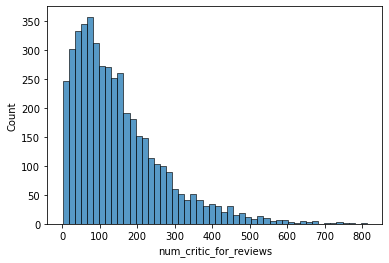

In [30]:
plt.show = sns.histplot(df['num_critic_for_reviews'], bins=50)

In [31]:
# treat ['duration']
# find moviie title for which ['duration'] is null
df[['movie_title']][df['duration'].isnull()]


,movie_title
4392,N-Secure


In [32]:
# assign duration 
df.at[4392, 'duration'] = 116

In [33]:
list(df[num_col].isnull().sum()[df[num_col].notnull().sum() != 0].index)

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [34]:
random_data = pd.DataFrame(columns = ["Ran_" + name for name in num_col])
notNA_columns = list(df[num_col].isnull().sum()[df[num_col].isnull().sum() == 0].index)
notNA_columns

['duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'num_voted_users',
 'cast_total_facebook_likes',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'movie_facebook_likes']

In [35]:
missing_columns = list(df[num_col].isnull().sum()[df[num_col].isnull().sum() != 0].index)
missing_columns

['num_critic_for_reviews',
 'gross',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'aspect_ratio']

In [36]:
from sklearn import linear_model
dett_data = pd.DataFrame(columns = ["Det_" + name for name in missing_columns])

for feature in missing_columns:
    dett_data["Det_" + feature] = df[feature]
    
    model = linear_model.LinearRegression()
    model.fit(X = df[notNA_columns][df[feature].notnull()], y = df[feature][df[feature].notnull()])
    predict = model.predict(df[notNA_columns])
    
    dett_data.loc[df[feature].isnull() & (predict > 0), "Det_" + feature] = predict[df[feature].isnull() & 
                                                                                    (predict>0)]
    
    

In [37]:
dett_data.isnull().sum()

Det_num_critic_for_reviews     0
Det_gross                      7
Det_facenumber_in_poster       0
Det_num_user_for_reviews       0
Det_budget                    10
Det_aspect_ratio               0
dtype: int64

In [38]:
from sklearn import linear_model

random_data = pd.DataFrame(columns = ["Ran_" + name for name in missing_columns])
df2 = df.copy()

for feature in missing_columns:
    random_data["Ran_" + feature] = df[feature]
    
    model = linear_model.LinearRegression()
    model.fit(X = df[notNA_columns][df[feature].notnull()], y = df[feature][df[feature].notnull()])
    
    #Standard Error of the regression estimates is equal to std() of the errors of each estimates
    std_error = (predict[df[feature].notnull()] - df.loc[df[feature].notnull(), feature]).std()
    
    
    random_predict = np.random.normal(size = df[feature].shape[0], 
                                      loc = predict, 
                                      scale = std_error)
    
    random_data.loc[(df[feature].isnull()) & (random_predict > 0), "Ran_" + feature] = random_predict[(df[feature].isnull()) & 
                                                                            (random_predict > 0)] # random_predict > 0 so that no negative values

In [39]:
random_data.isnull().sum()

# some not imputed as they are < 0

Ran_num_critic_for_reviews      4
Ran_gross                     275
Ran_facenumber_in_poster        2
Ran_num_user_for_reviews        0
Ran_budget                    143
Ran_aspect_ratio                0
dtype: int64

In [40]:
random_data[random_data.isnull().any(axis=1)]

,Ran_num_critic_for_reviews,Ran_gross,Ran_facenumber_in_poster,Ran_num_user_for_reviews,Ran_budget,Ran_aspect_ratio
55,298.000000,1.230703e+08,0.0,345.0,NaN,2.350000
84,10.000000,NaN,3.0,15.0,NaN,2.060213
422,84.000000,7.875350e+07,0.0,146.0,NaN,1.850000
430,127.000000,NaN,0.0,211.0,8000000.0,1.850000
477,19.000000,8.219970e+05,0.0,40.0,NaN,1.850000
...,...,...,...,...,...,...
5005,52.000000,NaN,0.0,23.0,NaN,1.660000
5006,85.338812,NaN,0.0,2.0,60000.0,1.594567
5014,58.000000,3.931553e+07,0.0,129.0,NaN,2.350000
5019,43.000000,7.947651e+07,0.0,33.0,NaN,1.850000


In [41]:
# random imputation for those that are 

for i in random_data.columns:
    observed_gross = random_data[i][random_data[i].notnull()]
    missing_gross =  random_data[i][random_data[i].isnull()]
    
    random_data.loc[random_data[i].isnull(), i] = np.random.choice(observed_gross, missing_gross.size, replace=True )

In [42]:
random_data.isnull().sum()

Ran_num_critic_for_reviews    0
Ran_gross                     0
Ran_facenumber_in_poster      0
Ran_num_user_for_reviews      0
Ran_budget                    0
Ran_aspect_ratio              0
dtype: int64

In [43]:
random_data.describe()

,Ran_num_critic_for_reviews,Ran_gross,Ran_facenumber_in_poster,Ran_num_user_for_reviews,Ran_budget,Ran_aspect_ratio
count,4554.000000,4.554000e+03,4554.000000,4554.000000,4.554000e+03,4554.000000
mean,150.010763,4.988149e+07,1.355980,293.466419,4.692388e+07,2.107651
std,121.049333,6.701585e+07,2.000777,387.267372,2.110041e+08,0.506980
min,1.000000,1.620000e+02,0.000000,1.000000,2.180000e+02,0.865822
25%,62.000000,6.852892e+06,0.000000,82.000000,8.000000e+06,1.850000
50%,120.000000,2.834147e+07,1.000000,175.000000,2.200000e+07,2.350000
75%,205.000000,6.548808e+07,2.000000,348.000000,5.000000e+07,2.350000
max,813.000000,7.605058e+08,43.000000,5060.000000,1.221550e+10,16.000000


In [44]:
random_data['Ran_facenumber_in_poster'] = np.round(random_data['Ran_facenumber_in_poster'])
random_data['Ran_num_user_for_reviews'] = np.round(random_data['Ran_num_user_for_reviews'])

In [45]:
random_data

,Ran_num_critic_for_reviews,Ran_gross,Ran_facenumber_in_poster,Ran_num_user_for_reviews,Ran_budget,Ran_aspect_ratio
0,723.0,760505847.0,0.0,3054.0,237000000.0,1.780000
1,302.0,309404152.0,0.0,1238.0,300000000.0,2.350000
2,602.0,200074175.0,1.0,994.0,245000000.0,2.350000
3,813.0,448130642.0,0.0,2701.0,250000000.0,2.350000
5,462.0,73058679.0,1.0,738.0,263700000.0,2.350000
...,...,...,...,...,...,...
5034,35.0,70071.0,0.0,35.0,7000.0,1.623378
5035,56.0,2040920.0,0.0,130.0,7000.0,1.370000
5036,22.0,4946250.0,0.0,1.0,3250.0,2.138314
5037,14.0,4584.0,1.0,14.0,9000.0,2.685129


In [46]:
# reassign imputed random_data dataframe back to df

df = df.copy()
df[missing_columns] = random_data

In [47]:
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64